# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Chairunnisa Mahadewi Budi Santosa - 1301213104
2. Dian Syafilla                     - 1301213229
3. Syifa Fatimah Azzahra             - 1301213487

# Project Background

Dataset MetroPT-3 ini mengungkapkan tantangan perawatan prediktif nyata yang dihadapi dalam industri ini. Ini dapat digunakan untuk prediksi kegagalan, penjelasan anomali, dan tugas-tugas lainnya. Pada project CLO 4 ini, fokus kami adalah pada penggunaan algoritma unsupervised learning. Dapat diketahui bahwa dataset MetroPT-3 memiliki 15 atribut dan 15169480 instances tanpa missing value. Pada penelitian ini kami memilih 2 metode yaitu Random forest dan Gradien Boosting Classifier.


## Data Preprocessing & Data Exploration

In [ ]:
# Import Library dan Dataset
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Memotong dataset menjadi 100,000 baris pertama
dataset = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')
dataset = dataset[0:100000]
dataset.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
# Menghapus kolom 'Unnamed: 0' dan menampilkan statistik deskriptif untuk setiap kolom
dataset = dataset.drop(columns='Unnamed: 0')
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TP2,100000.0,0.570024,2.257192,-0.030,-0.012,-0.0120,-0.0100,10.5440
TP3,100000.0,8.970174,0.555464,7.324,8.494,8.9480,9.4240,10.1640
H1,100000.0,8.373563,2.257944,-0.030,8.390,8.8620,9.3600,10.1580
DV_pressure,100000.0,-0.015490,0.097673,-0.028,-0.020,-0.0180,-0.0160,6.5300
Reservoirs,100000.0,8.972447,0.554905,7.326,8.496,8.9500,9.4260,10.1680
Oil_temperature,100000.0,57.114244,3.377109,31.975,55.300,57.3000,59.1750,69.1500
Motor_current,100000.0,1.309649,1.991827,0.020,0.035,0.0375,3.7175,8.2925
COMP,100000.0,0.935790,0.245128,0.000,1.000,1.0000,1.0000,1.0000
DV_eletric,100000.0,0.064230,0.245163,0.000,0.000,0.0000,0.0000,1.0000
Towers,100000.0,0.967940,0.176160,0.000,1.000,1.0000,1.0000,1.0000


In [ ]:
# Memberikan informasi tentang tipe data dan missing values.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        100000 non-null  object 
 1   TP2              100000 non-null  float64
 2   TP3              100000 non-null  float64
 3   H1               100000 non-null  float64
 4   DV_pressure      100000 non-null  float64
 5   Reservoirs       100000 non-null  float64
 6   Oil_temperature  100000 non-null  float64
 7   Motor_current    100000 non-null  float64
 8   COMP             100000 non-null  float64
 9   DV_eletric       100000 non-null  float64
 10  Towers           100000 non-null  float64
 11  MPG              100000 non-null  float64
 12  LPS              100000 non-null  float64
 13  Pressure_switch  100000 non-null  float64
 14  Oil_level        100000 non-null  float64
 15  Caudal_impulses  100000 non-null  float64
dtypes: float64(15), object(1)
memory usage:

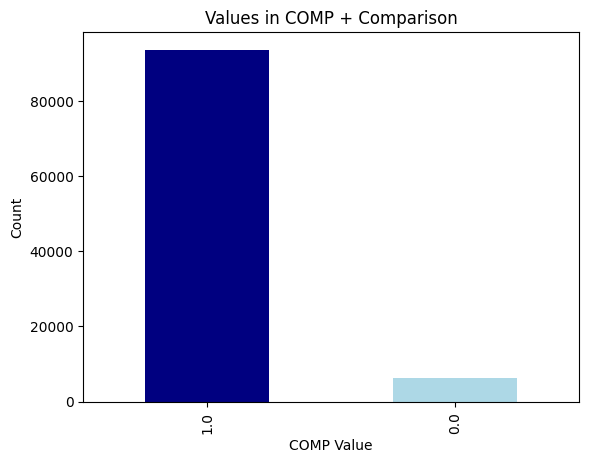

In [ ]:
# Menghitung dan memvisualisasikan distribusi nilai 'COMP' menggunakan bar plot.
COMP_counts = dataset['COMP'].value_counts()
COMP_counts.plot(kind='bar', color=['navy', 'lightblue'])

plt.title('Values in COMP + Comparison')
plt.xlabel('COMP Value')
plt.ylabel('Count')
plt.show()

<ipython-input-9-437d235611d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = dataset.corr(method='spearman')


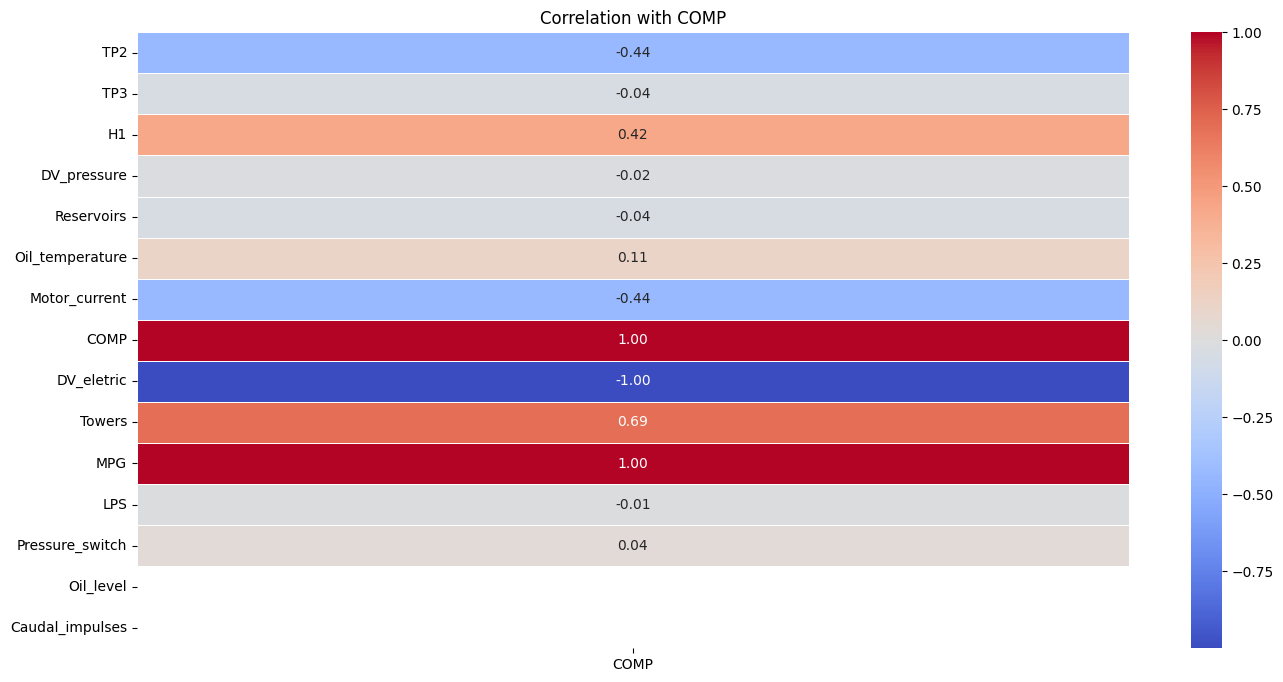

In [ ]:
matrix_corr = dataset.corr(method='spearman')

COMP_corr = matrix_corr['COMP']
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(COMP_corr.to_frame(), annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)

plt.title('Correlation with COMP')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
print("Correlation with COMP - Oil Level:", matrix_corr['COMP']['Oil_level'])
print("Correlation with COMP - Caudal Impulses:", matrix_corr['COMP']['Caudal_impulses'])

Correlation with COMP - Oil Level: nan
Correlation with COMP - Caudal Impulses: nan


In [ ]:
# Menentukan kolom-kolom yang akan dihapus dan menghapus kolom tersebut dari dataset
columns_to_drop = ['Oil_level', 'Caudal_impulses', 'DV_eletric', 'Towers', 'MPG']
dataset = dataset.drop(columns=columns_to_drop)

In [ ]:
# Menampilkan plot
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=dataset['timestamp'],y=dataset["COMP"],name="COMP"),secondary_y=False,)
fig.update_layout(autosize=False,width=850,height=300,title_text="COMP in Timestamp")
fig.update_xaxes(title_text="index")
fig.update_yaxes(title_text="value",secondary_y=False)
fig.show()

In [ ]:
# Menghapus kolom 'timestamp' dari dataset.
dataset = dataset.drop(columns='timestamp')

# Model Baseline

In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Split Data menjadi data validasi dan data testing
X = dataset.drop(columns=['COMP'])
y = dataset['COMP']

test_size = 0.2
random_state = 42
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)

In [ ]:
# Membuat model RandomForestClassifier untuk melatih model ini menggunakan data training
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=84)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=84)

In [ ]:
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

In [ ]:
# Menghitung dan menampilkan akurasi, presisi, recall, dan F1-score untuk setiap set data.
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1-Score: {train_f1}")

Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

In [ ]:
print("\nValidation Set Metrics:")
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1-Score: {val_f1}")


Validation Set Metrics:
Accuracy: 0.9998
Precision: 0.9997864616698697
Recall: 1.0
F1-Score: 0.999893219434063


In [ ]:
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [ ]:
print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1-Score: {test_f1}")


Test Set Metrics:
Accuracy: 0.9999
Precision: 1.0
Recall: 0.9998932878027958
F1-Score: 0.9999466410543727


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_train_pred = gb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

In [ ]:
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1-Score: {train_f1}")

Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
y_val_pred = gb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)


In [ ]:
print("\nValidation Set Metrics:")
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1-Score: {val_f1}")



Validation Set Metrics:
Accuracy: 0.9998
Precision: 0.9997864616698697
Recall: 1.0
F1-Score: 0.999893219434063


In [ ]:
y_test_pred = gb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [ ]:
print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1-Score: {test_f1}")


Test Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


# Exploration Model

In [ ]:
# === Model 1 ===
# Membuat model RandomForestClassifier dengan 400 pohon, kedalaman maksimum 15, dan seed random state 84.
rf_model1 = RandomForestClassifier(n_estimators=400, max_depth=15, random_state=84)
rf_model1.fit(X_train, y_train)

y_train_pred = rf_model1.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1-Score: {train_f1}")

Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
# === Model 2 ===
# Membuat model kedua dengan 50 pohon, kedalaman maksimum 15, dan seed random state 84.
rf_model2 = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=84)
rf_model2.fit(X_train, y_train)

y_train_pred = rf_model2.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1-Score: {train_f1}")

Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
# === Model 3 ===
# Membuat model ketiga dengan 200 pohon, kedalaman maksimum 5, dan seed random state 84.
rf_model3 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=84)
rf_model3.fit(X_train, y_train)

y_train_pred = rf_model3.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1-Score: {train_f1}")

Training Set Metrics:
Accuracy: 0.9999875
Precision: 0.9999866390540451
Recall: 1.0
F1-Score: 0.9999933194823936


# Evaluation and Analysis

Pemilihan metode Random forest mampu menyelesaikan permasalahan klasifikasi pada dataset MetroPT-3. Melalui best modelnya, seperti pada Training Test Matrix dan Test Set Matrix dan didapatkan akurasi sebesar 100%. Akurasi tersebut dipengaruhi beberapa faktor, diantaranya adalah kedalam pohon, jumlah estimator, dan target klasifikasi yang ingin dituju.

Sedangkan pemilihan metode Gradien Boosting Classifier juga dinilai mampu menyelesaikan permasalahan klasifikasi pada dataset MetroPT-3. Parameter n_estimators mengindikasikan jumlah pohon keputusan yang akan dibangun dalam proses boosting. random_state digunakan untuk memastikan hasil yang dapat direproduksi, yaitu setiap kali kita menjalankan model ini, hasilnya akan sama jika kita menggunakan nilai random_state yang sama. Melalui best model ditemukan bahwa Training Set Metric dan Test Set Metric memiliki tingkat akurasi 100% sedangkan Validation set Metric memiliki akurasi 99%. Akurasi dipengaruhi oleh jumlah pohon keputusan yang digunakan dan nilai random state yang diatur.

#Conclusion

Kesimpulannya, baik Random Forest maupun Gradient Boosting Classifier dapat menjadi pilihan yang efektif untuk menangani dataset MetroPT-3, dengan penyesuaian parameter yang cermat sebagai kunci untuk mencapai hasil yang optimal. Akurasi yang tinggi pada data pelatihan dan pengujian menunjukkan kemampuan model untuk memahami dan memprediksi pola dalam dataset tersebut. Namun pada saat ini kita memilih metode random forest sebagai metode yang paling sesuai karena Model Random Forest dapat bekerja dengan baik meskipun terdapat fitur-fitur yang tidak relevan dalam dataset. Dalam hal ini beberapa fitur masih kurang korelasinya satu sama lain.